#### **Importamos las librerias que usaremos durante el resto del EDA**

In [322]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
# Para ignorar advertencias y que el codigo quede mas limpio
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Cargamos los datasets correspondientes

In [361]:
historico_velocidad         = pd.read_csv("./_src/datasets/historico_velocidad_internet_prov.csv") 
accesos_por_tecnologia_prov = pd.read_csv("./_src/datasets/Internet_Accesos-por-tecnologia_prov.csv",dtype={"Wireless":str,"Otros":str})
accesos_por_tecnologia      = pd.read_csv("./_src/datasets/Internet_Accesos-por-tecnologia.csv",dtype={"Wireless":str,"Otros":str})
accesos_por_velocidad       = pd.read_csv("./_src/datasets/Internet_Accesos-por-velocidad.csv",dtype=str)
internet_baf                = pd.read_csv("./_src/datasets/Internet_BAF-por-provincia.csv")
internet_ingresos           = pd.read_csv("./_src/datasets/Internet_Ingresos.csv")
internet_penetracion        = pd.read_csv("./_src/datasets/Internet_Penetracion.csv")


## **Observemos información crucial sobre las columnas y el tipo de datos que contienen, así como la cantidad de registros no nulos presentes de cada uno de los datasets**

### Historico velocidad

In [324]:
historico_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [325]:
historico_velocidad.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


Notemos que tenemos 2 columnas totalmente irrelevantes por lo que procedemos a eliminarlas.

In [326]:
historico_velocidad.drop(columns=["Unnamed: 4","Unnamed: 5"],inplace=True)

Corroboramos que no tenga ningun defecto las otras columnas

In [327]:
print(historico_velocidad["Año"].unique())
print(historico_velocidad["Trimestre"].unique())
print(historico_velocidad["Provincia"].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014]
[3 2 1 4]
['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


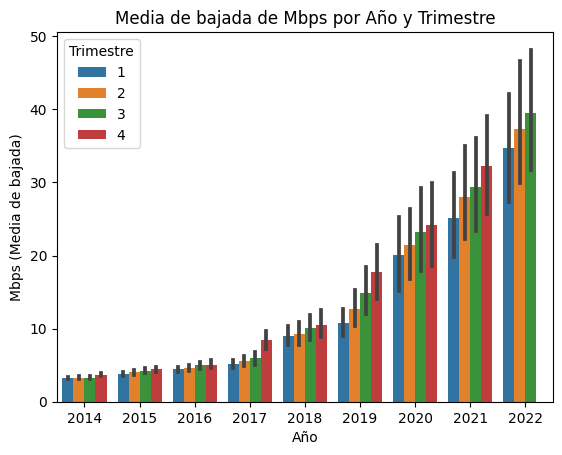

In [328]:
# Gráfico de barras agrupadas en Seaborn
sns.barplot(data=historico_velocidad, x='Año', y='Mbps (Media de bajada)', hue='Trimestre')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Media de bajada de Mbps por Año y Trimestre')
plt.show()

In [329]:
# historico_velocidad.to_csv("./_src/datasets_pbi/historico_velocidad_prov.csv",index=False)

### accesos_por_tecnologia

In [330]:
accesos_por_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     object
 3   Cablemodem    35 non-null     object
 4   Fibra óptica  35 non-null     object
 5   Wireless      35 non-null     object
 6   Otros         35 non-null     object
 7   Total         35 non-null     object
 8   Periodo       35 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.6+ KB


In [331]:
accesos_por_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


Notemos 2 aspectos importantes:
1. La columna `Periodo` ya esta separada por `Año` y `Trimestre`, por lo que la eliminamos
2. Notemos que las columnas numericas que son referentes a las tecnologias, estan expresadas en el rango de miles a millones, sin embargo estan erroneamente con los puntos por lo se "leen" de forma incorrecta

In [332]:
# Creamos una funcion generalizada para transformar columnas a valor numerico
def transform_to_numeric(dataset,columnas):
    for columna in columnas:
        dataset[columna] = dataset[columna].str.replace(".","")
        dataset[columna] = pd.to_numeric(dataset[columna])
    return dataset

In [333]:
accesos_por_tecnologia.drop(columns="Periodo",inplace=True)
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless','Otros', 'Total']
accesos_por_tecnologia = transform_to_numeric(accesos_por_tecnologia,columnas)

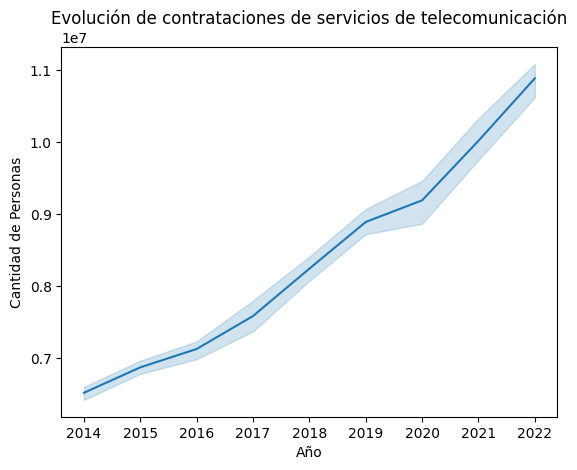

In [334]:
# Gráfico de línea en Seaborn
sns.lineplot(data=accesos_por_tecnologia, x='Año', y='Total')
plt.xlabel('Año')
plt.ylabel('Cantidad de Personas')
plt.title('Evolución de contrataciones de servicios de telecomunicación')
plt.show()

In [335]:
# accesos_por_tecnologia.to_csv("./_src/datasets_pbi/accesos_por_tecnologia.csv",index=False)

### accesos_por_tecnologia_prov

Este dataset tiene un proceso muy similar al anterior

In [336]:
accesos_por_tecnologia_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           841 non-null    object
 1   Trimestre     841 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    object
 4   Cablemodem    840 non-null    object
 5   Fibra óptica  840 non-null    object
 6   Wireless      840 non-null    object
 7   Otros         840 non-null    object
 8   Total         840 non-null    object
dtypes: object(9)
memory usage: 59.3+ KB


In [337]:
accesos_por_tecnologia_prov.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [338]:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless','Otros', 'Total']
accesos_por_tecnologia_prov = transform_to_numeric(accesos_por_tecnologia_prov,columnas)

In [339]:
# accesos_por_tecnologia_prov.to_csv("./_src/datasets_pbi/accesos_por_tecnologia_prov.csv",index=False)

### internet_ingresos 

In [340]:
internet_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [341]:
internet_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


Al igual que en accesos_por_tecnologia, vamos a transformar la columna de Ingresos (miles de pesos) y a eliminar la columna Periodo pues ya la tenemos dividida en Año y Trimestre


In [342]:
internet_ingresos.drop(columns="Periodo",inplace=True)
internet_ingresos = transform_to_numeric(internet_ingresos,["Ingresos (miles de pesos)"])

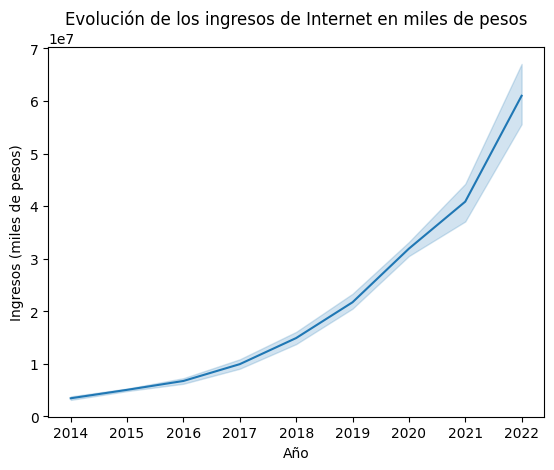

In [343]:
# Gráfico de línea en Seaborn
sns.lineplot(data=internet_ingresos, x='Año', y='Ingresos (miles de pesos)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolución de los ingresos de Internet en miles de pesos')
plt.show()

In [344]:
internet_ingresos.to_csv("./_src/datasets_pbi/internet_ingresos.csv",index=False)

### internet baf

In [345]:
internet_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [346]:
internet_baf.head(10)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778
5,2022,3,Córdoba,1.038.600,68,1.038.668
6,2022,3,Corrientes,144.842,4,144.846
7,2022,3,Entre Ríos,268.937,22,268.959
8,2022,3,Formosa,68.537,1,68.538
9,2022,3,Jujuy,118.823,- 0,118.823


Procedemos a transformar correctamente las columnas con valores numericos

In [347]:
internet_baf["Dial up"] = internet_baf["Dial up"].str.replace("-","")
internet_baf = transform_to_numeric(internet_baf,["Banda ancha fija","Dial up","Total"])

In [348]:
# internet_baf.to_csv("./_src/datasets_pbi/internet_baf.csv",index=False)

### internet_penetracion

In [349]:
internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [350]:
internet_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


Observemos que tenemos la columna `Accesos por cada 100 hogares` como _string_ en vez de _numerica_. Vamos a transformarla para poder realizar analisis estadisticos mas precisos


In [351]:
internet_penetracion["Accesos por cada 100 hogares"] = internet_penetracion["Accesos por cada 100 hogares"].str.replace(",",".")
internet_penetracion["Accesos por cada 100 hogares"] = pd.to_numeric(internet_penetracion["Accesos por cada 100 hogares"])

In [352]:
internet_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


Utilicemos un diagrama de caja para  analizar la distribución de la penetración de Internet en los hogares.
Este enfoque nos permitirá visualizar y examinar la variabilidad en la adopción de Internet en diferentes provincias, identificando posibles diferencias significativas, valores atipicos y situaciones inusuales.

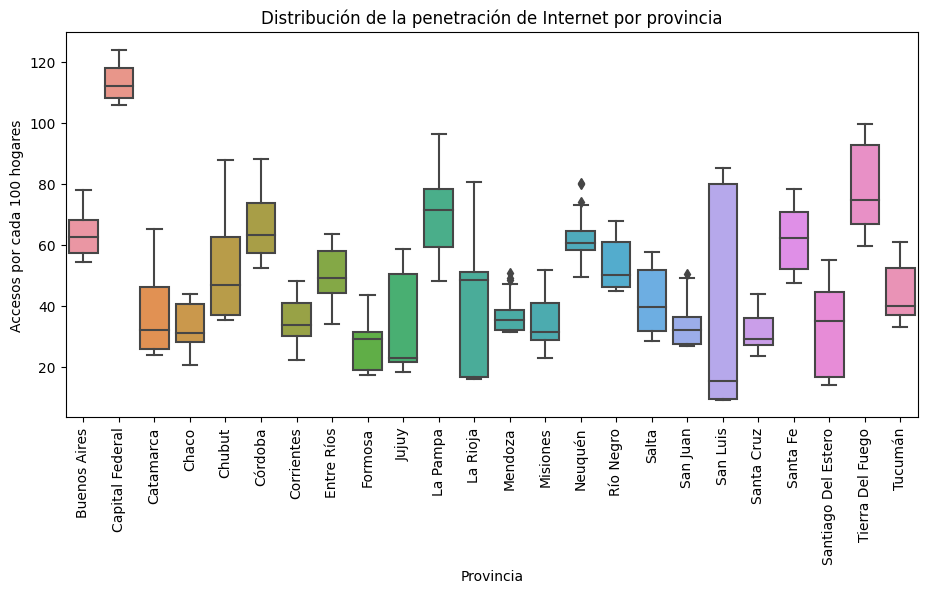

In [358]:
# Diagrama de caja en Seaborn
plt.figure(figsize=(11, 5))
sns.boxplot(data=internet_penetracion, x='Provincia', y='Accesos por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Distribución de la penetración de Internet por provincia')
plt.xticks(rotation=90)
plt.show()

Al analizar el diagrama de caja resultante, se puede observar visualmente que las provincias de `Mendoza`, `Neuquén` y `San Juan` presentan **valores atípicos**. 

Además, podemos destacar que la provincia de `Capital Federal` muestra una posición considerablemente más alta en términos de accesos en comparación con las demás provincias. Esto nos permite implementar estrategias específicas y promover el crecimiento de la conectividad en áreas específicas

In [359]:
# Finalizamos llevando el dataset limpio a un csv 
# internet_penetracion.to_csv("./_src/datasets_pbi/internet_penetracion.csv",index=False)

### accesos_por_velocidad

In [366]:
accesos_por_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71,384,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461,987,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [367]:
columnas_numericas = ["Año","Trimestre",'HASTA 512 kbps','+ 512 Kbps - 1 Mbps',
                      '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps',
                      '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS','Total']


In [368]:
accesos_por_velocidad = transform_to_numeric(accesos_por_velocidad,columnas_numericas)

In [370]:
#accesos_por_velocidad.to_csv("./_src/datasets_pbi/accesos_por_velocidad.csv")